In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('HR_comma_sep.csv')
dataframe.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1.下面我们看一下，随着 工程数量的增加，然后每个月工作时间的增加关系

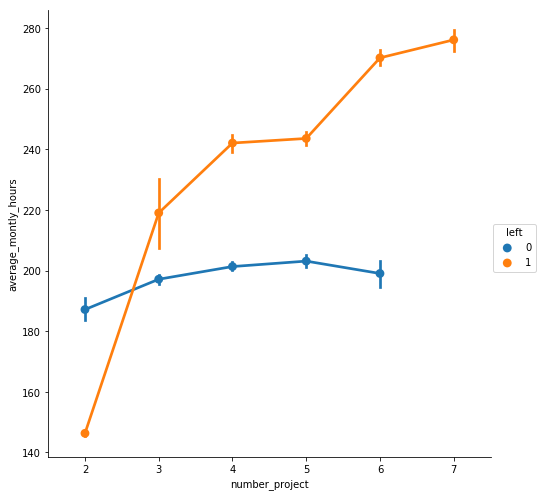

In [4]:
sns.factorplot(x='number_project',y='average_montly_hours',hue='left',data=dataframe,size=7)
plt.show()

可以看出 ，left为0还在公司的人，1为离开的人 ，离开的人，工程数量越多，花的时间也越多，估计这个时候，会觉得工作时间太长，而没法接受，采取离职的做法

2.现在研究一下 工资越高，是否工作时间越高

In [24]:
money = dataframe.salary
dataframe['money'] = money.map({'low': 1, 'medium': 2,'high':3})
dataframe.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,money
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


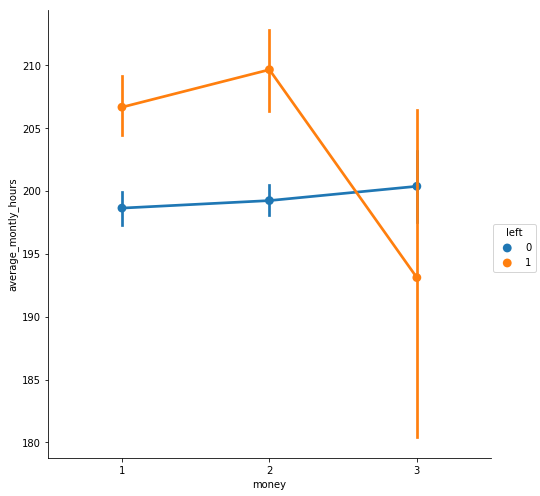

In [23]:
sns.factorplot(x='money',y='average_montly_hours',hue='left',data=dataframe,size=7)
plt.show()

答案可以看到，中低工资留下来的人，工资越高，工作的时间，大体上还是 小于 离开的人的，代表了，留下的人效率在 中低工资水平是 高出离开的人

3.分析 留下的人 和 离开的人 平均满意度

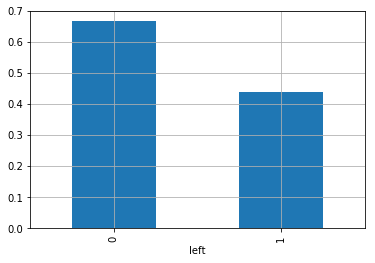

In [25]:
dataframe.groupby('left').satisfaction_level.mean().plot(kind='bar')
plt.grid(True)
plt.show()

结果是 留在的人 平均的 满意度高达 0.68左右，而离开的人的满意度只有 0.42左右，结论是满意度越低，越容易离职

用马云的话，离职两种可能，心委屈了，钱没给到位，很精辟啊

4.分析工作事故，以及被公司提拔 对 离职的影响

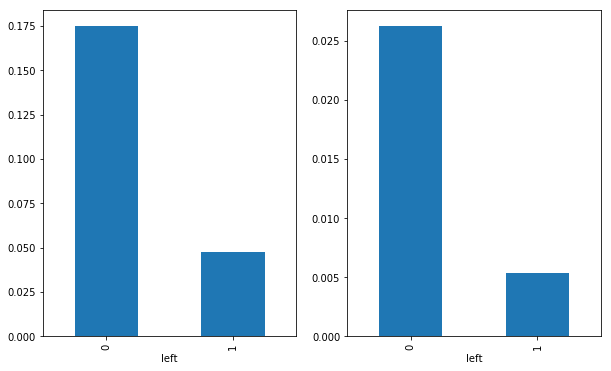

In [27]:
figure,axis = plt.subplots(ncols=2,figsize=(10,6))
dataframe.groupby('left').Work_accident.mean().plot(kind='bar',ax=axis[0])
dataframe.groupby('left').promotion_last_5years.mean().plot(kind='bar',ax=axis[1])
plt.show()

结果：离职的人 是 事故少，提拔少的人

5.研究一下，公司薪水分布情况

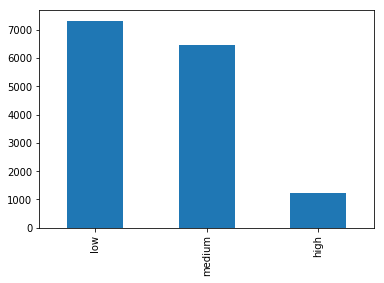

In [29]:
dataframe.salary.value_counts().plot(kind='bar')
plt.show()

6.不同薪水的离职率

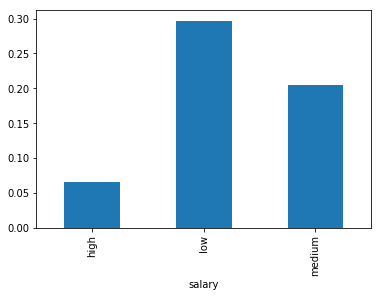

In [30]:
dataframe.groupby('salary').left.mean().plot(kind='bar')
plt.show()

7.不同职位的离职率

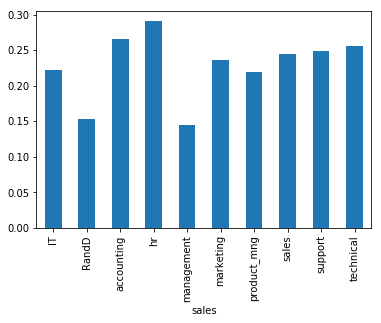

In [31]:
dataframe.groupby('sales').left.mean().plot(kind='bar')
plt.show()

In [32]:
#不同职位的 在职人数
dataframe.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [38]:
#看一下老员工有多少，大于5年的工龄的,还在职的,并且按人数 升序
dataframe[dataframe['time_spend_company']>=5][dataframe['left'] == 0].sales.value_counts().sort_values()

c:\users\work\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


hr              73
accounting      82
RandD           89
product_mng     97
marketing      105
IT             143
management     167
support        197
technical      244
sales          516
Name: sales, dtype: int64